Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb

Load the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('./data/bank-additional-full.csv', sep=';')

# View the first few rows
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Exploratory Data Analysis (EDA)

Dataset dimensions and data types

Examine target variable distribution

<Axes: xlabel='y'>

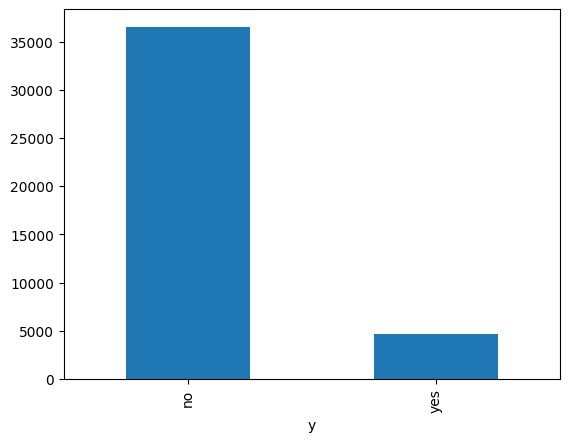

In [4]:
data['y'].value_counts().plot(kind='bar')  # Example for binary classification

### Visualize relationships and distributions

#### • Numerical Feature Distributions

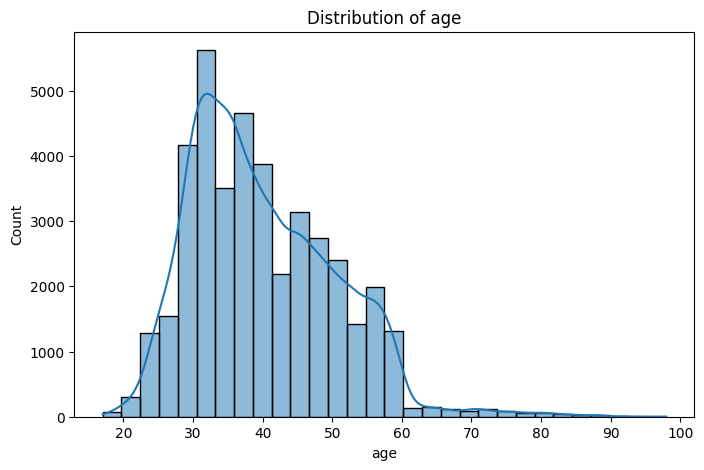

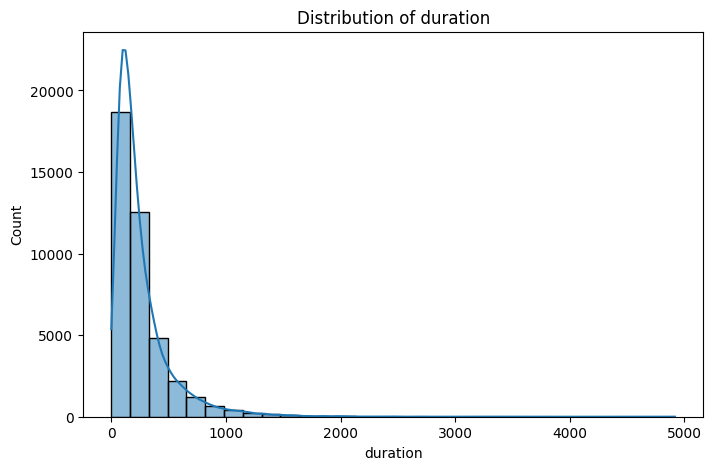

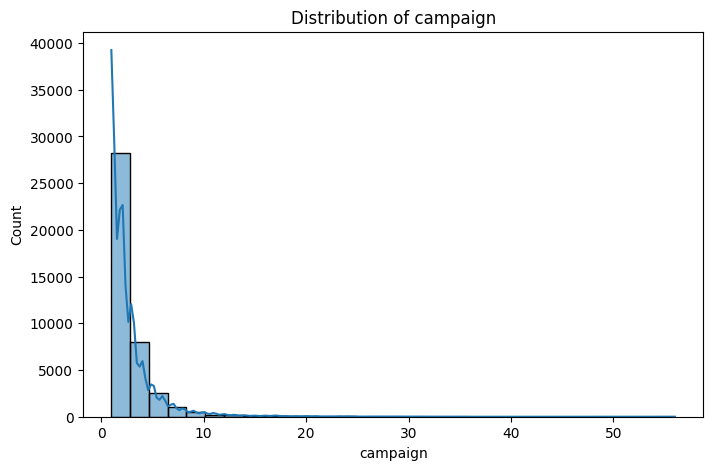

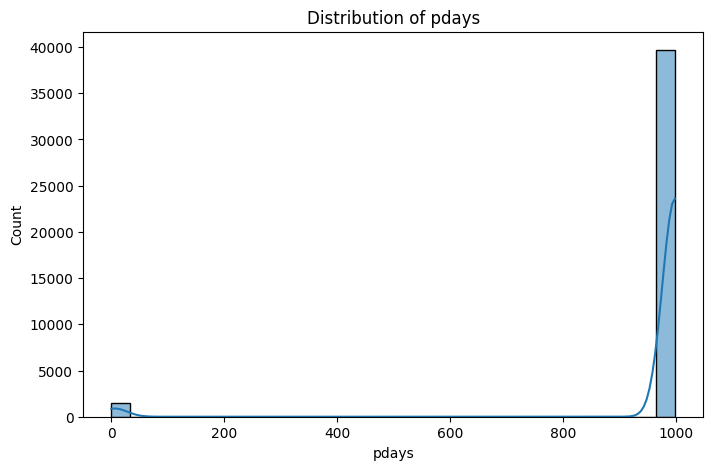

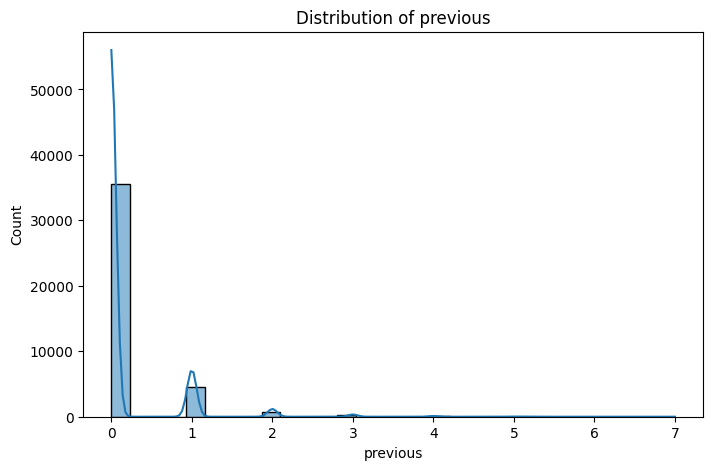

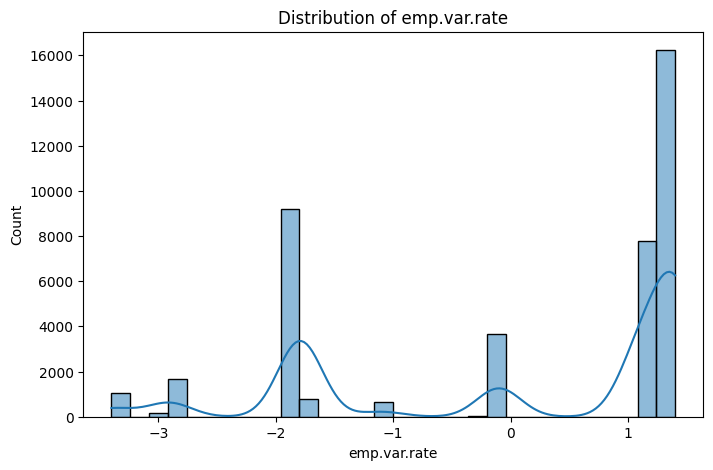

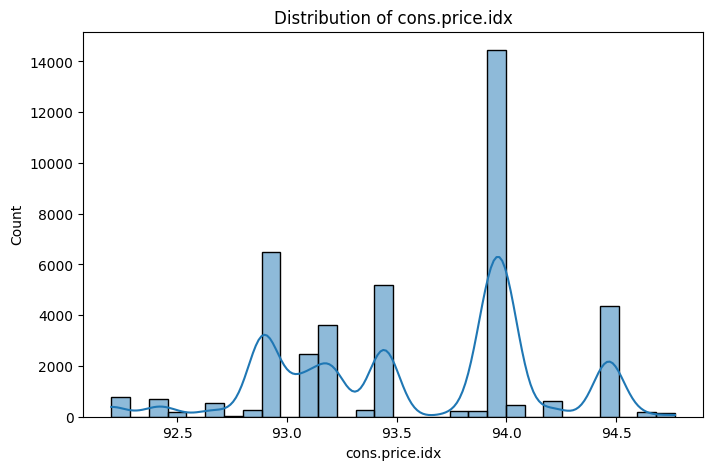

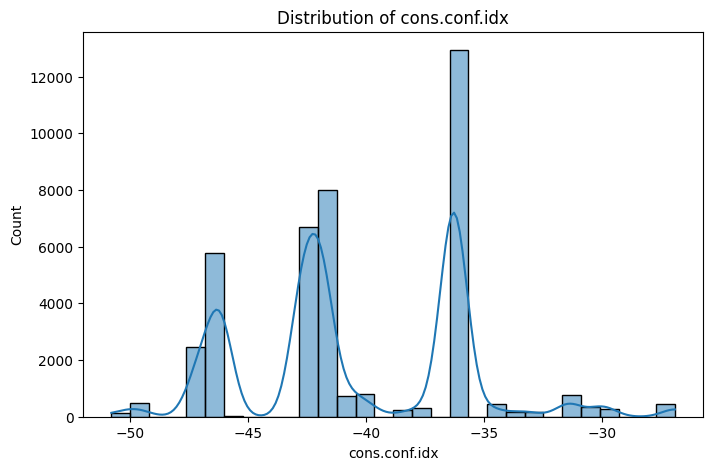

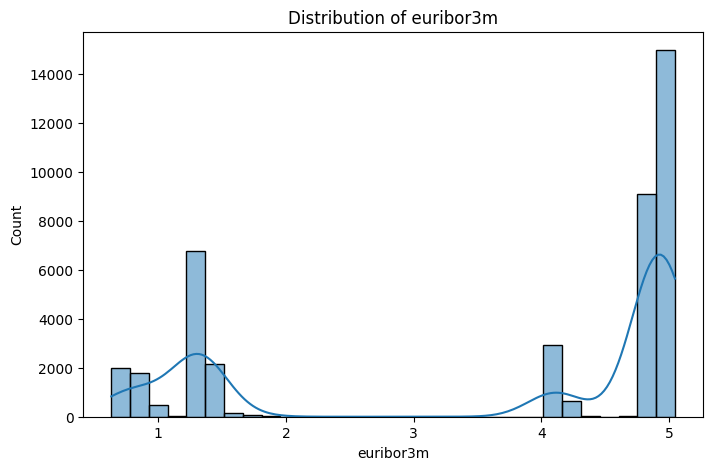

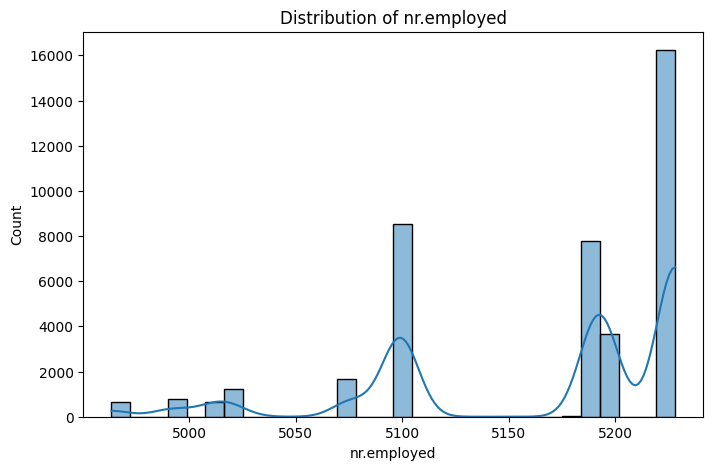

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                  'euribor3m', 'nr.employed']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

• Check for outliers using boxplots

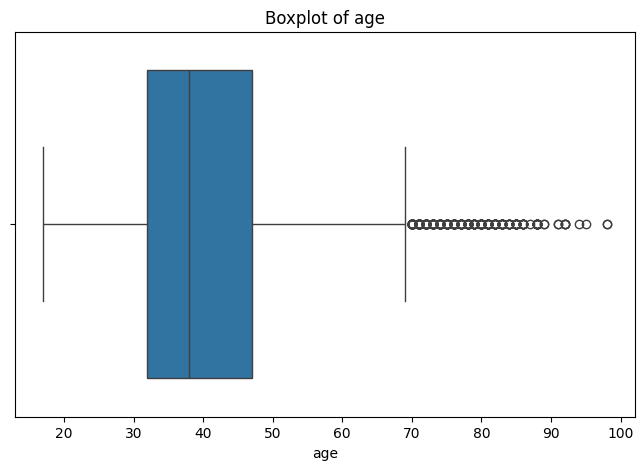

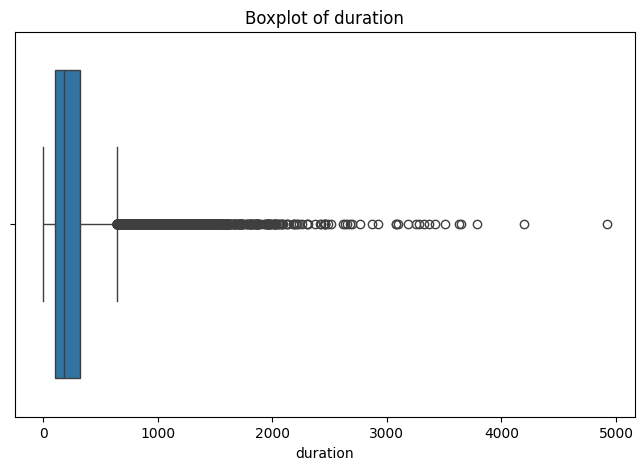

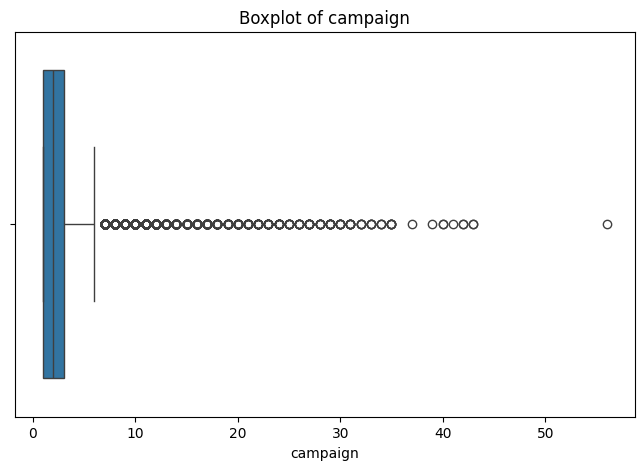

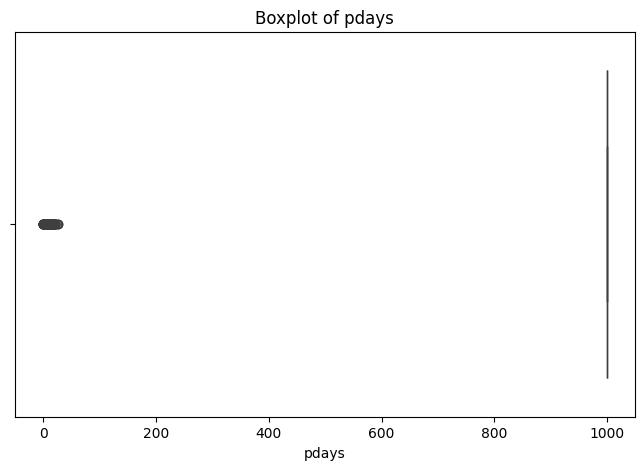

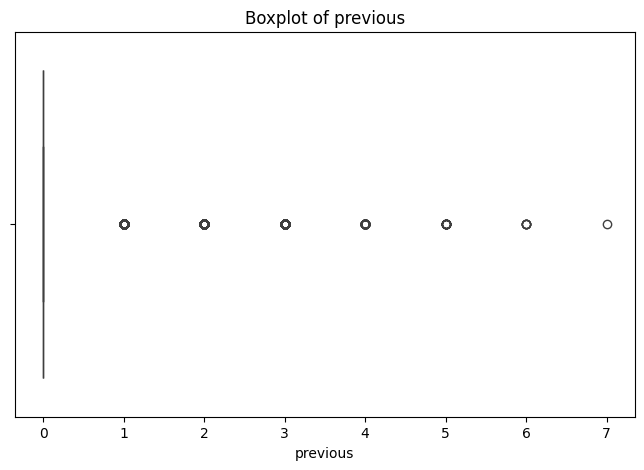

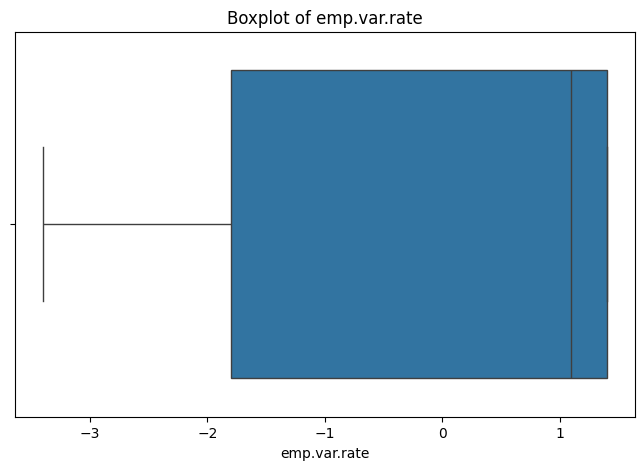

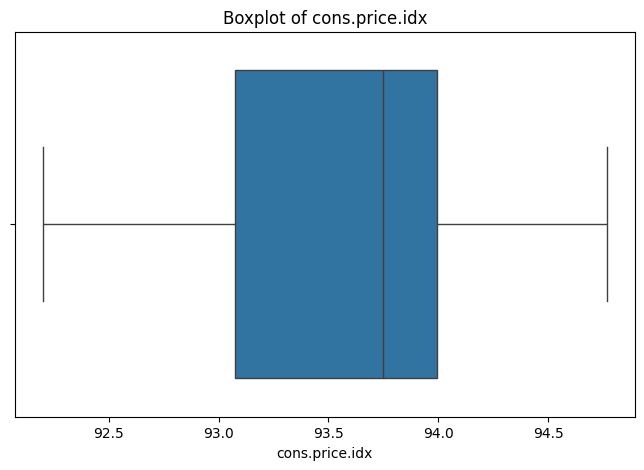

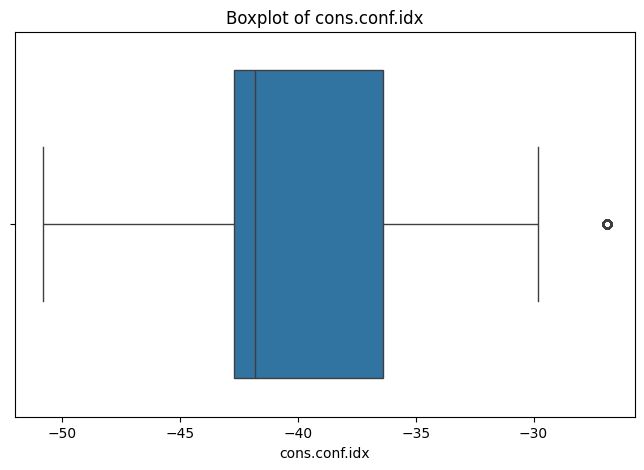

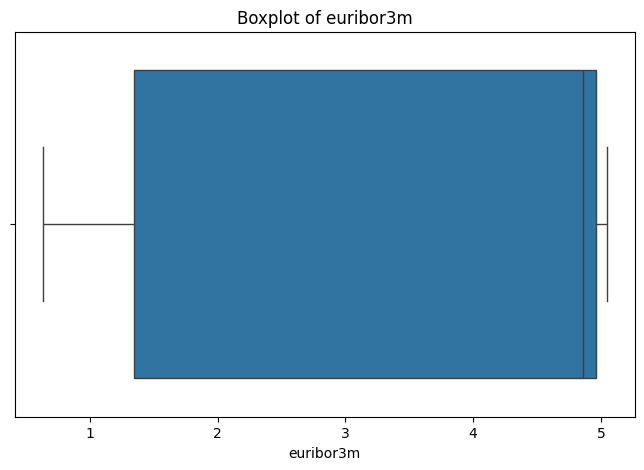

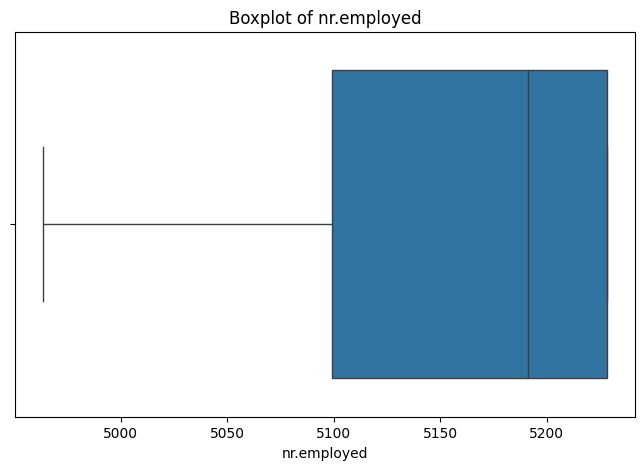

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### • Categorical Feature Distributions

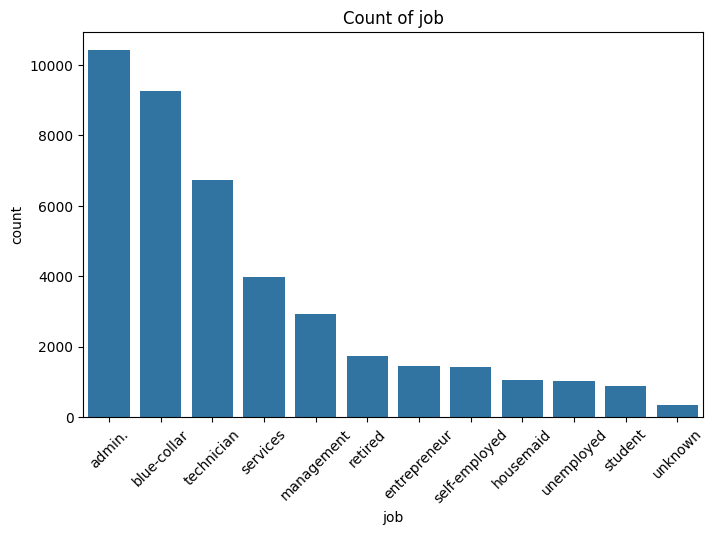

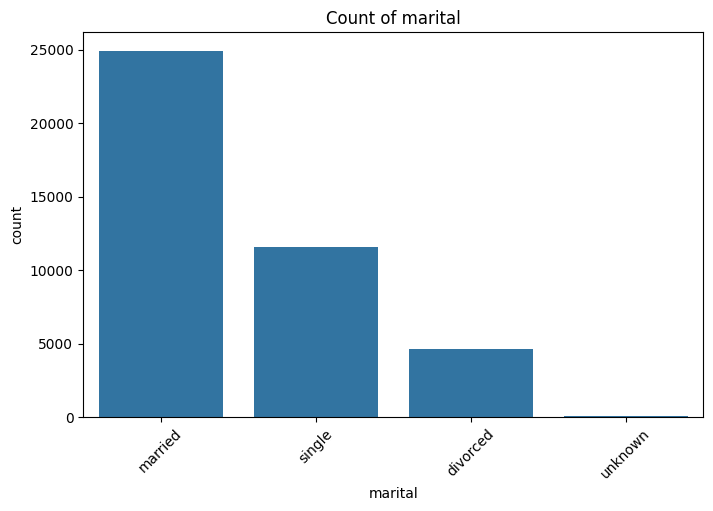

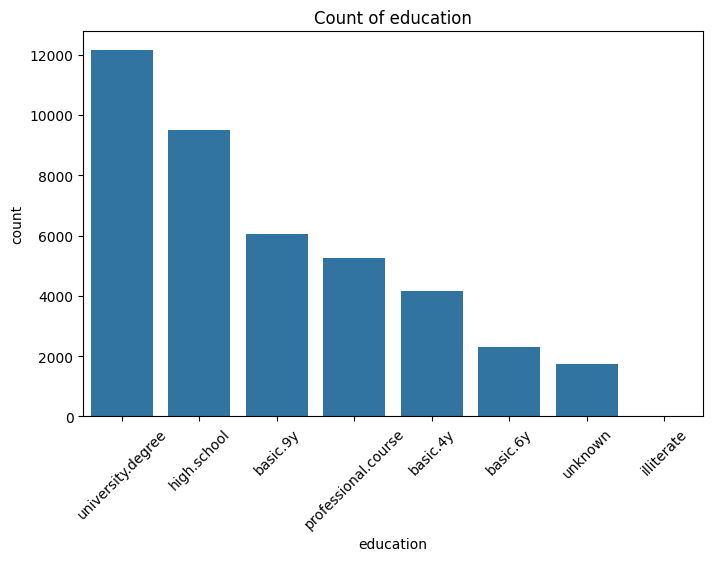

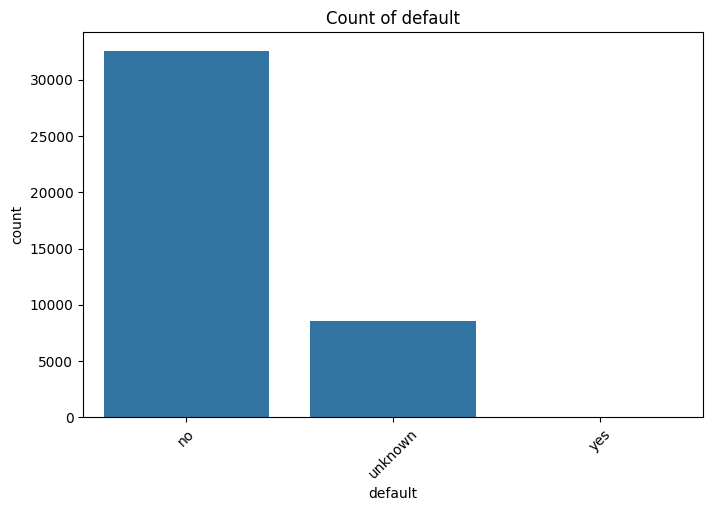

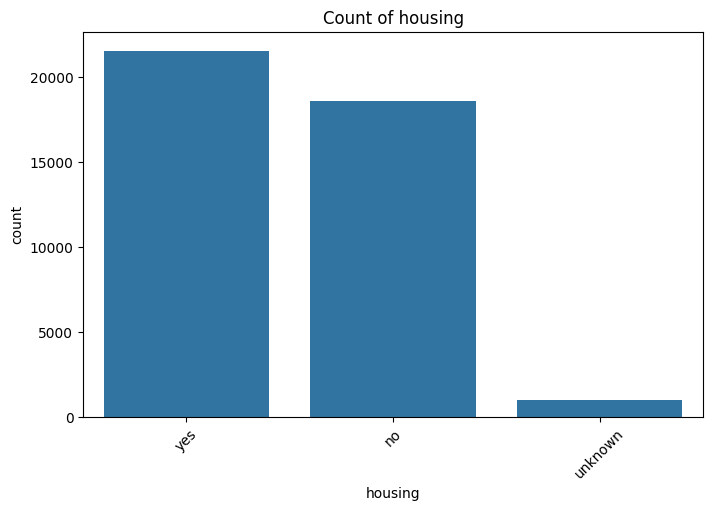

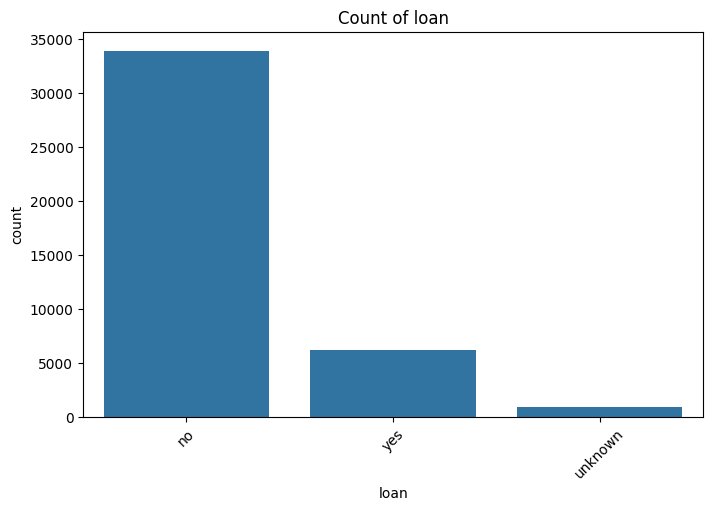

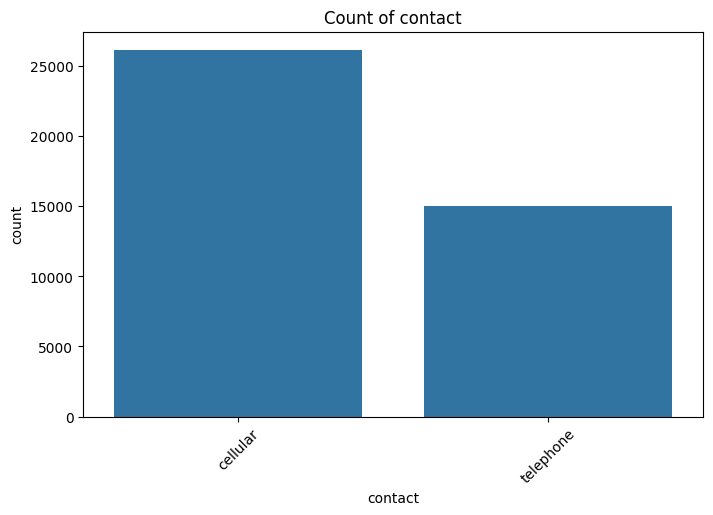

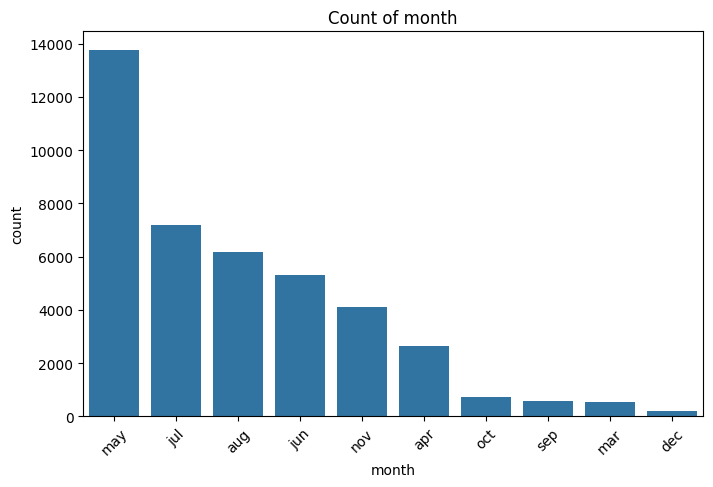

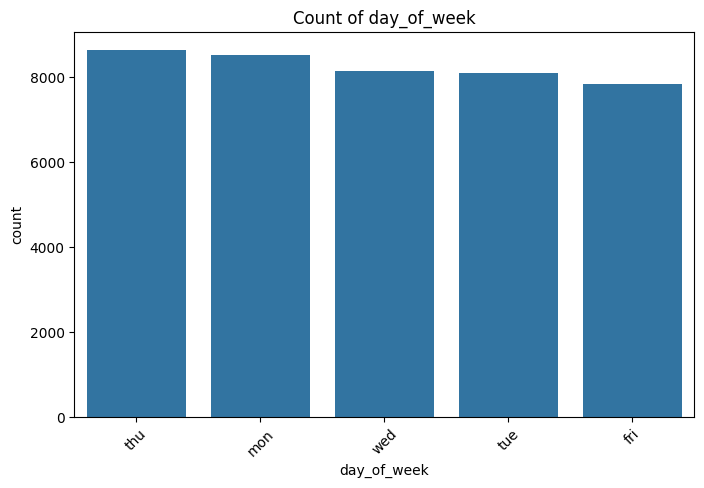

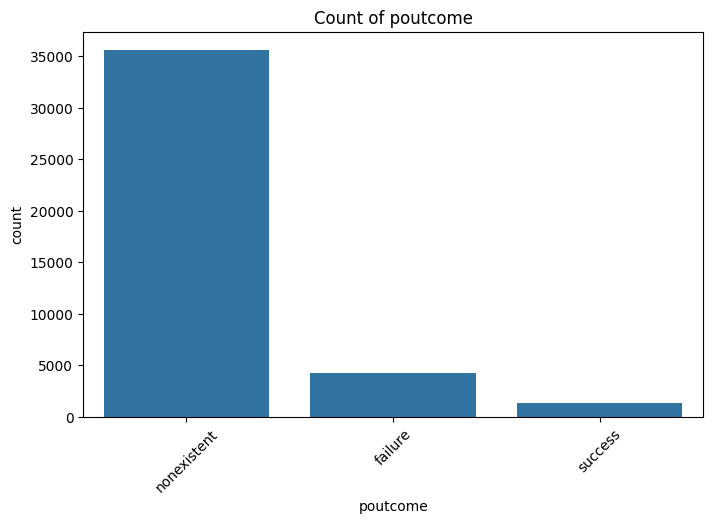

In [8]:
categorical_cols = ['job', 'marital', 'education', 'default', 
                    'housing', 'loan', 'contact', 'month', 
                    'day_of_week', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Relationship Between Features and Target Variable

• Used boxplots for numerical features against the target

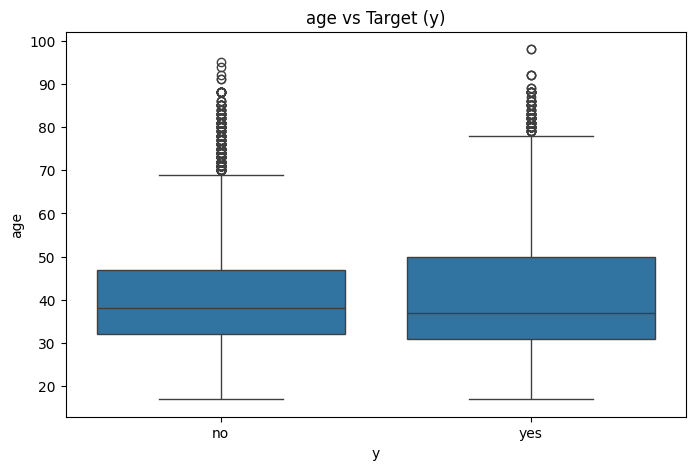

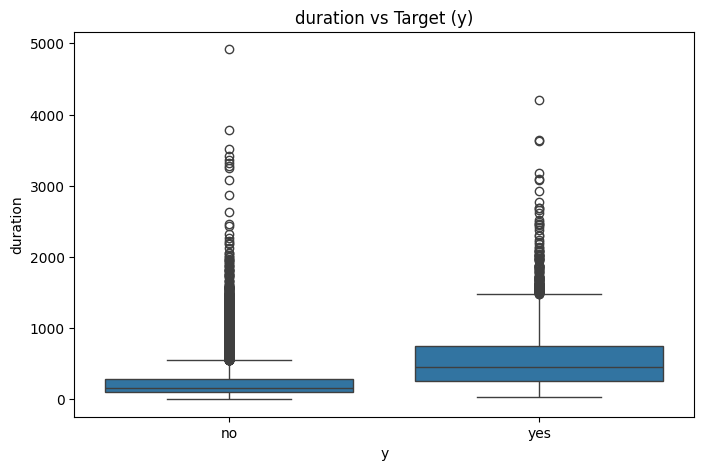

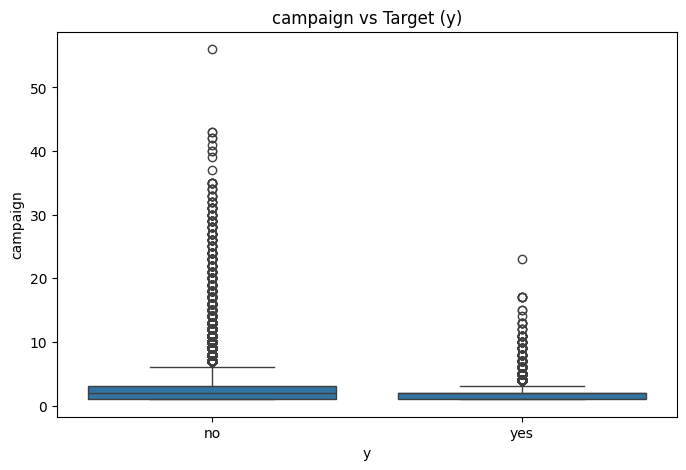

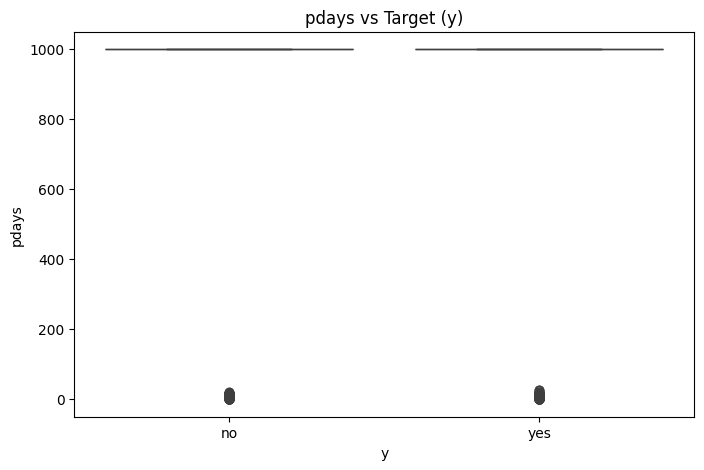

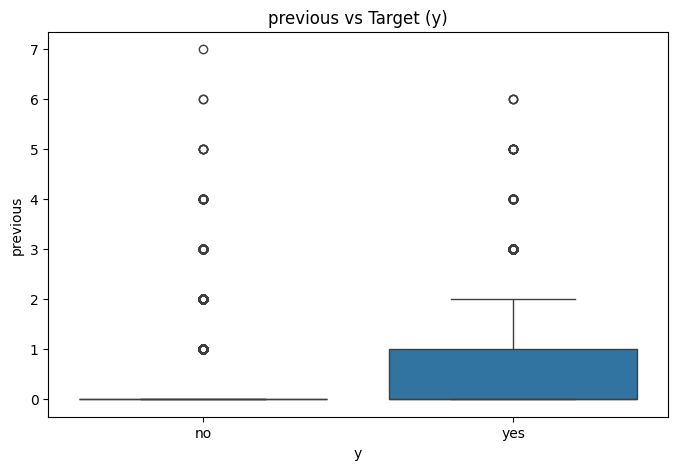

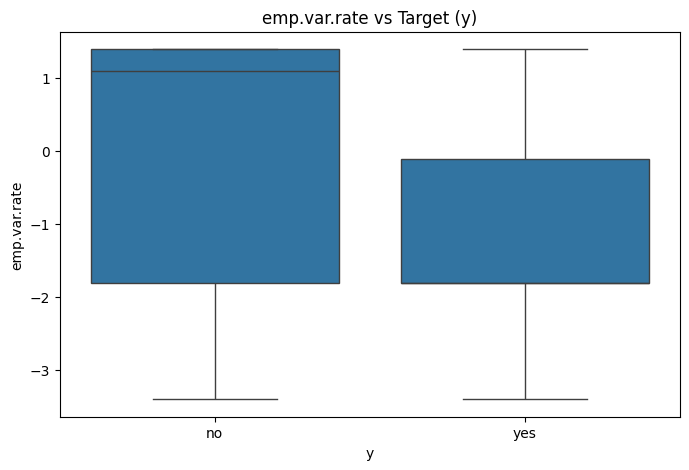

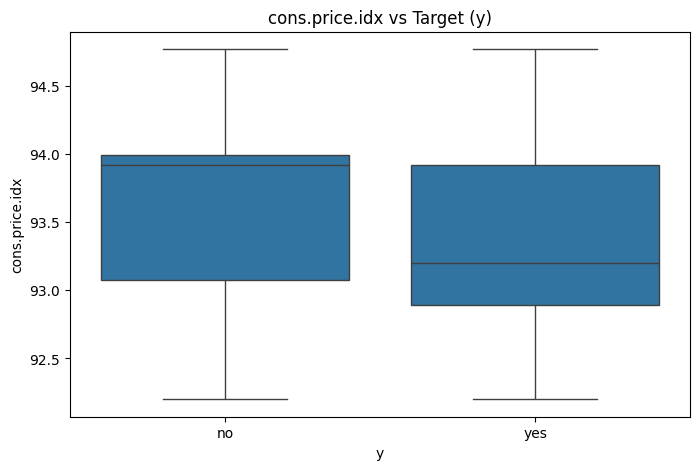

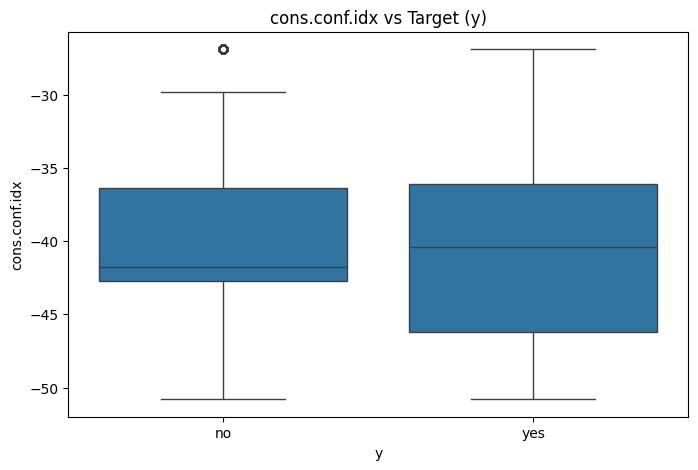

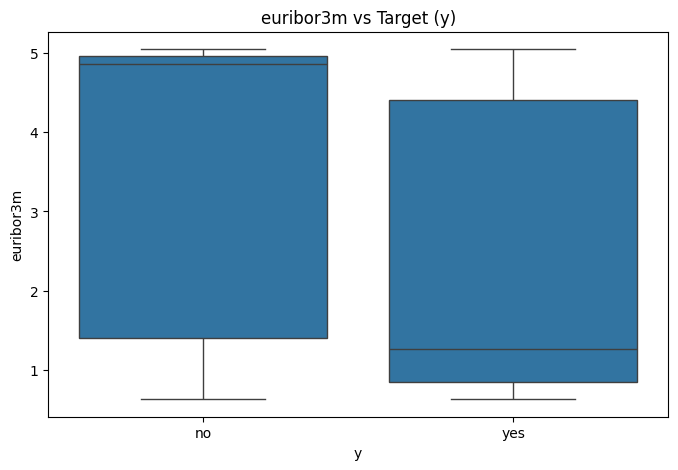

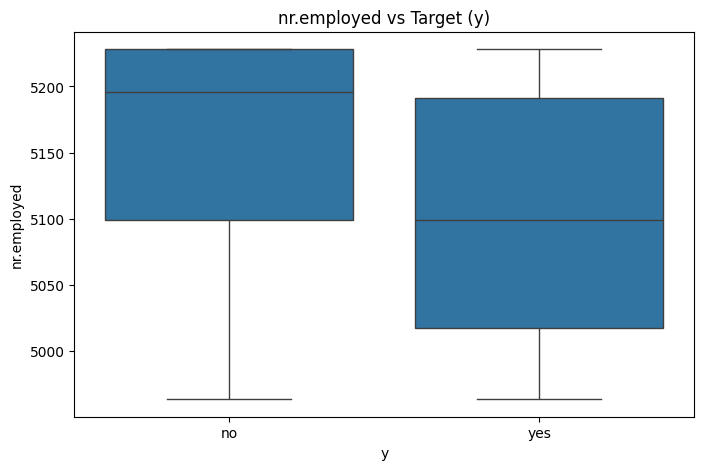

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f"{col} vs Target (y)")
    plt.show()

• Used bar plots for categorical features against the target

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


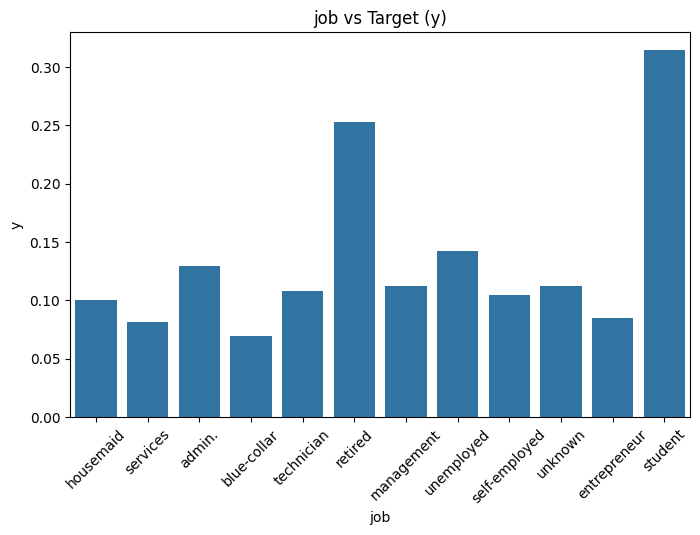

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


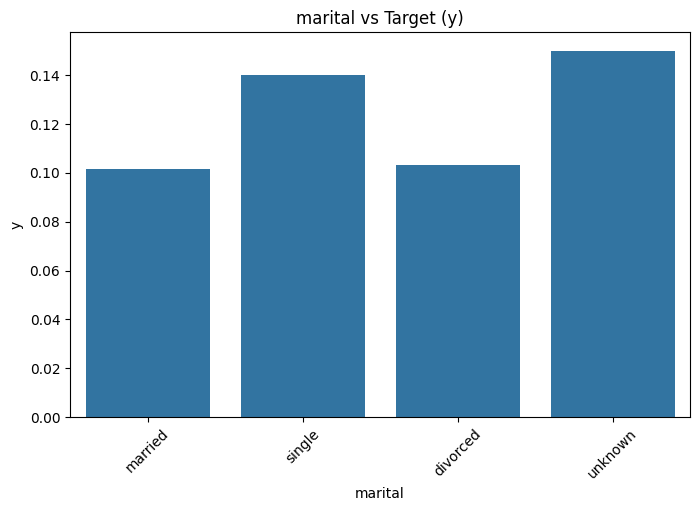

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


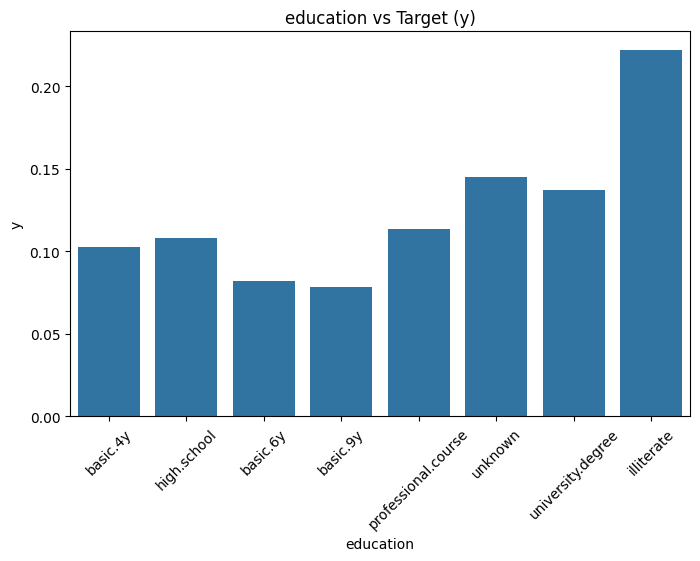

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


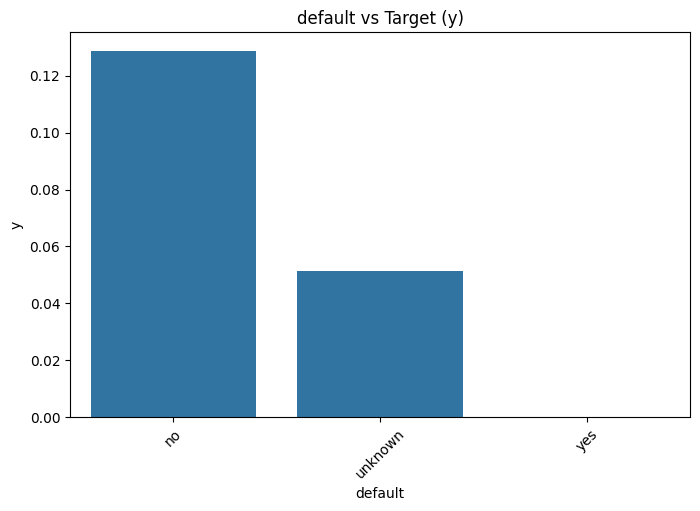

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


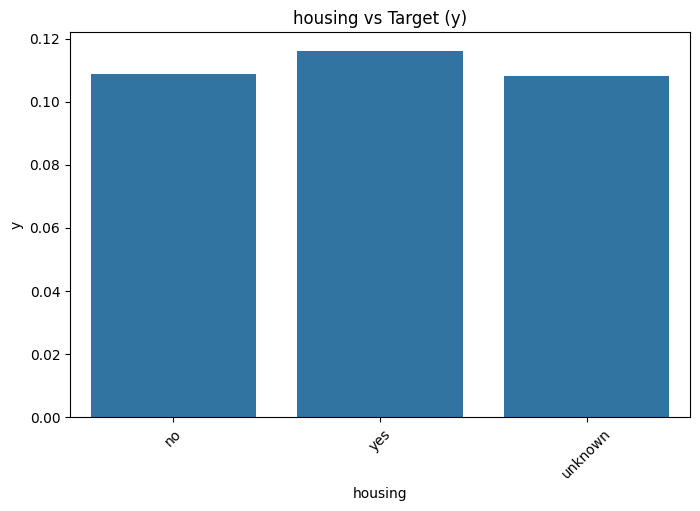

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


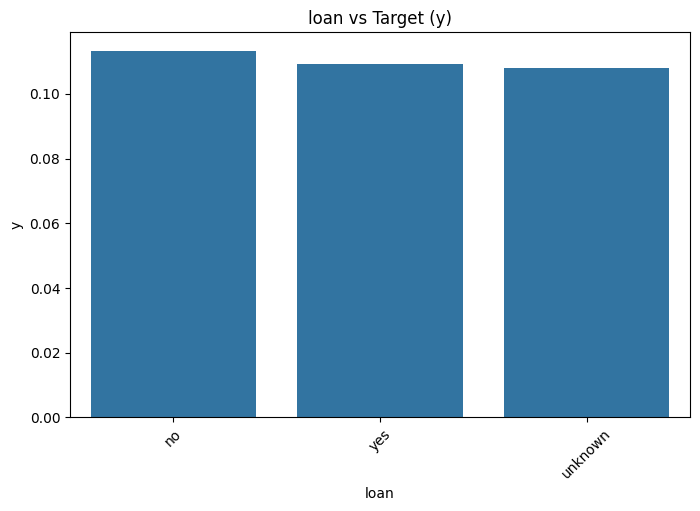

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


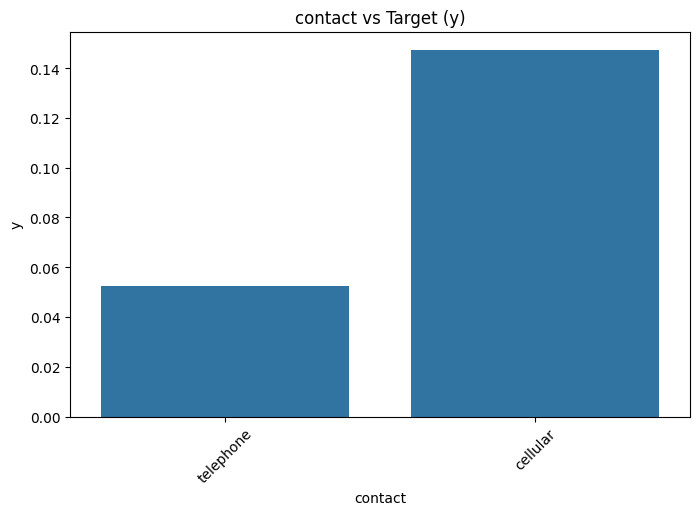

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


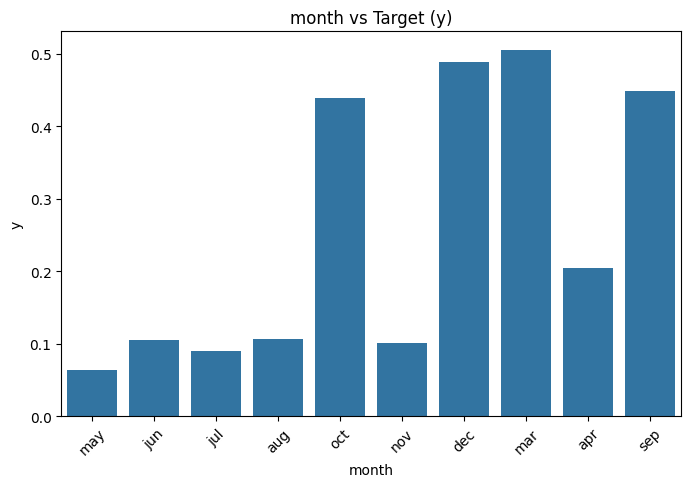

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


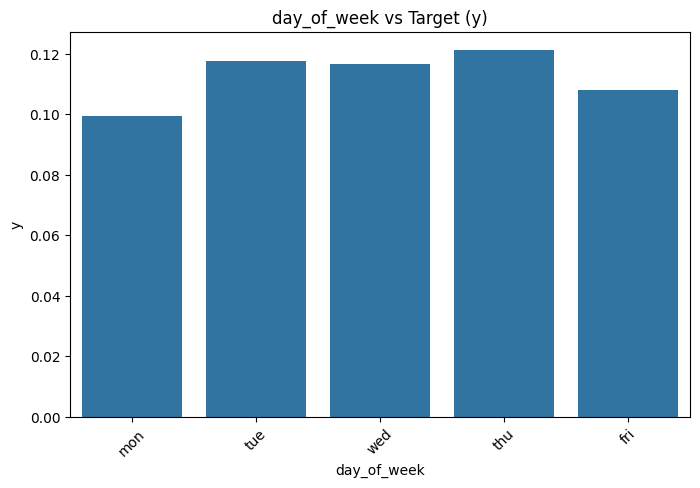

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3493037823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)


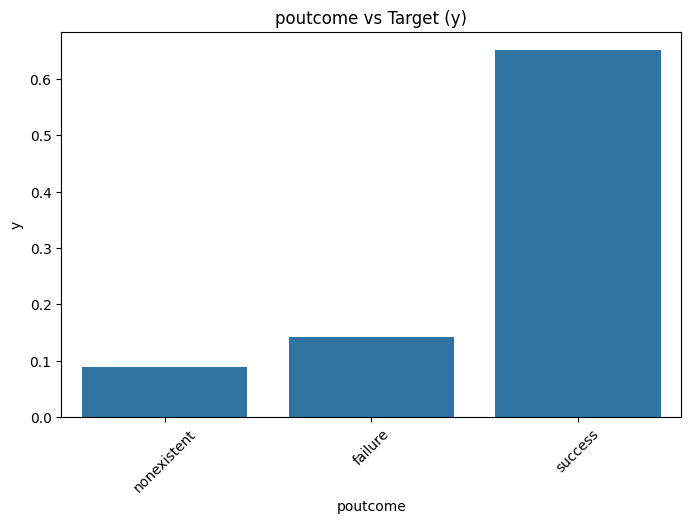

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y=data['y'].apply(lambda x: 1 if x == 'yes' else 0), data=data, ci=None)
    plt.title(f"{col} vs Target (y)")
    plt.xticks(rotation=45)
    plt.show()

#### Correlation Between Numerical Features

• Used a heatmap to visualize correlations between numerical features

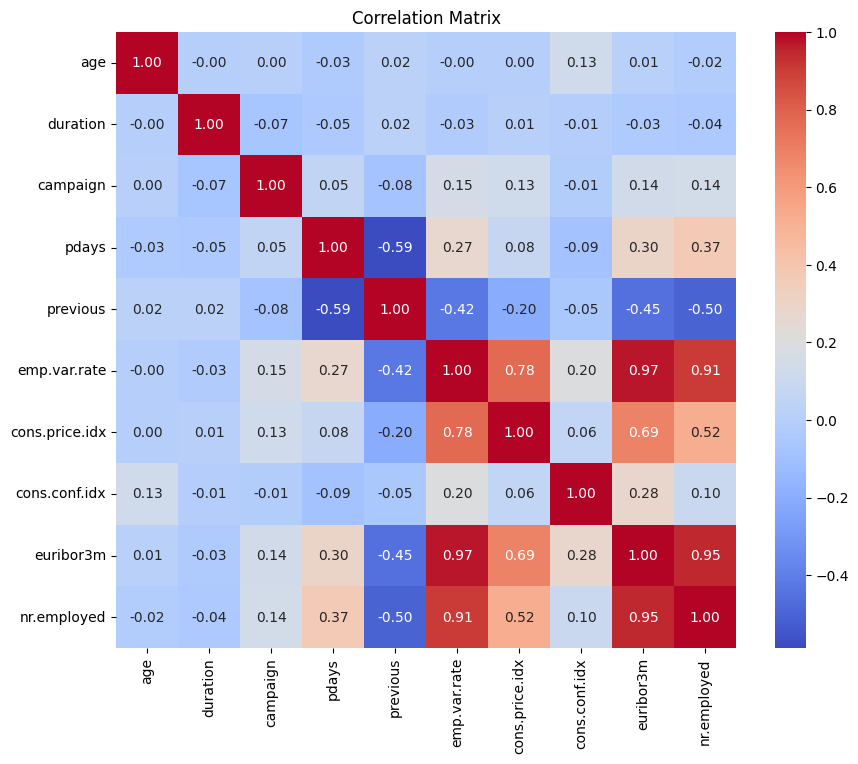

In [11]:
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Pairwise Relationships

• Used pairplots to explore relationships between numerical variables and the target

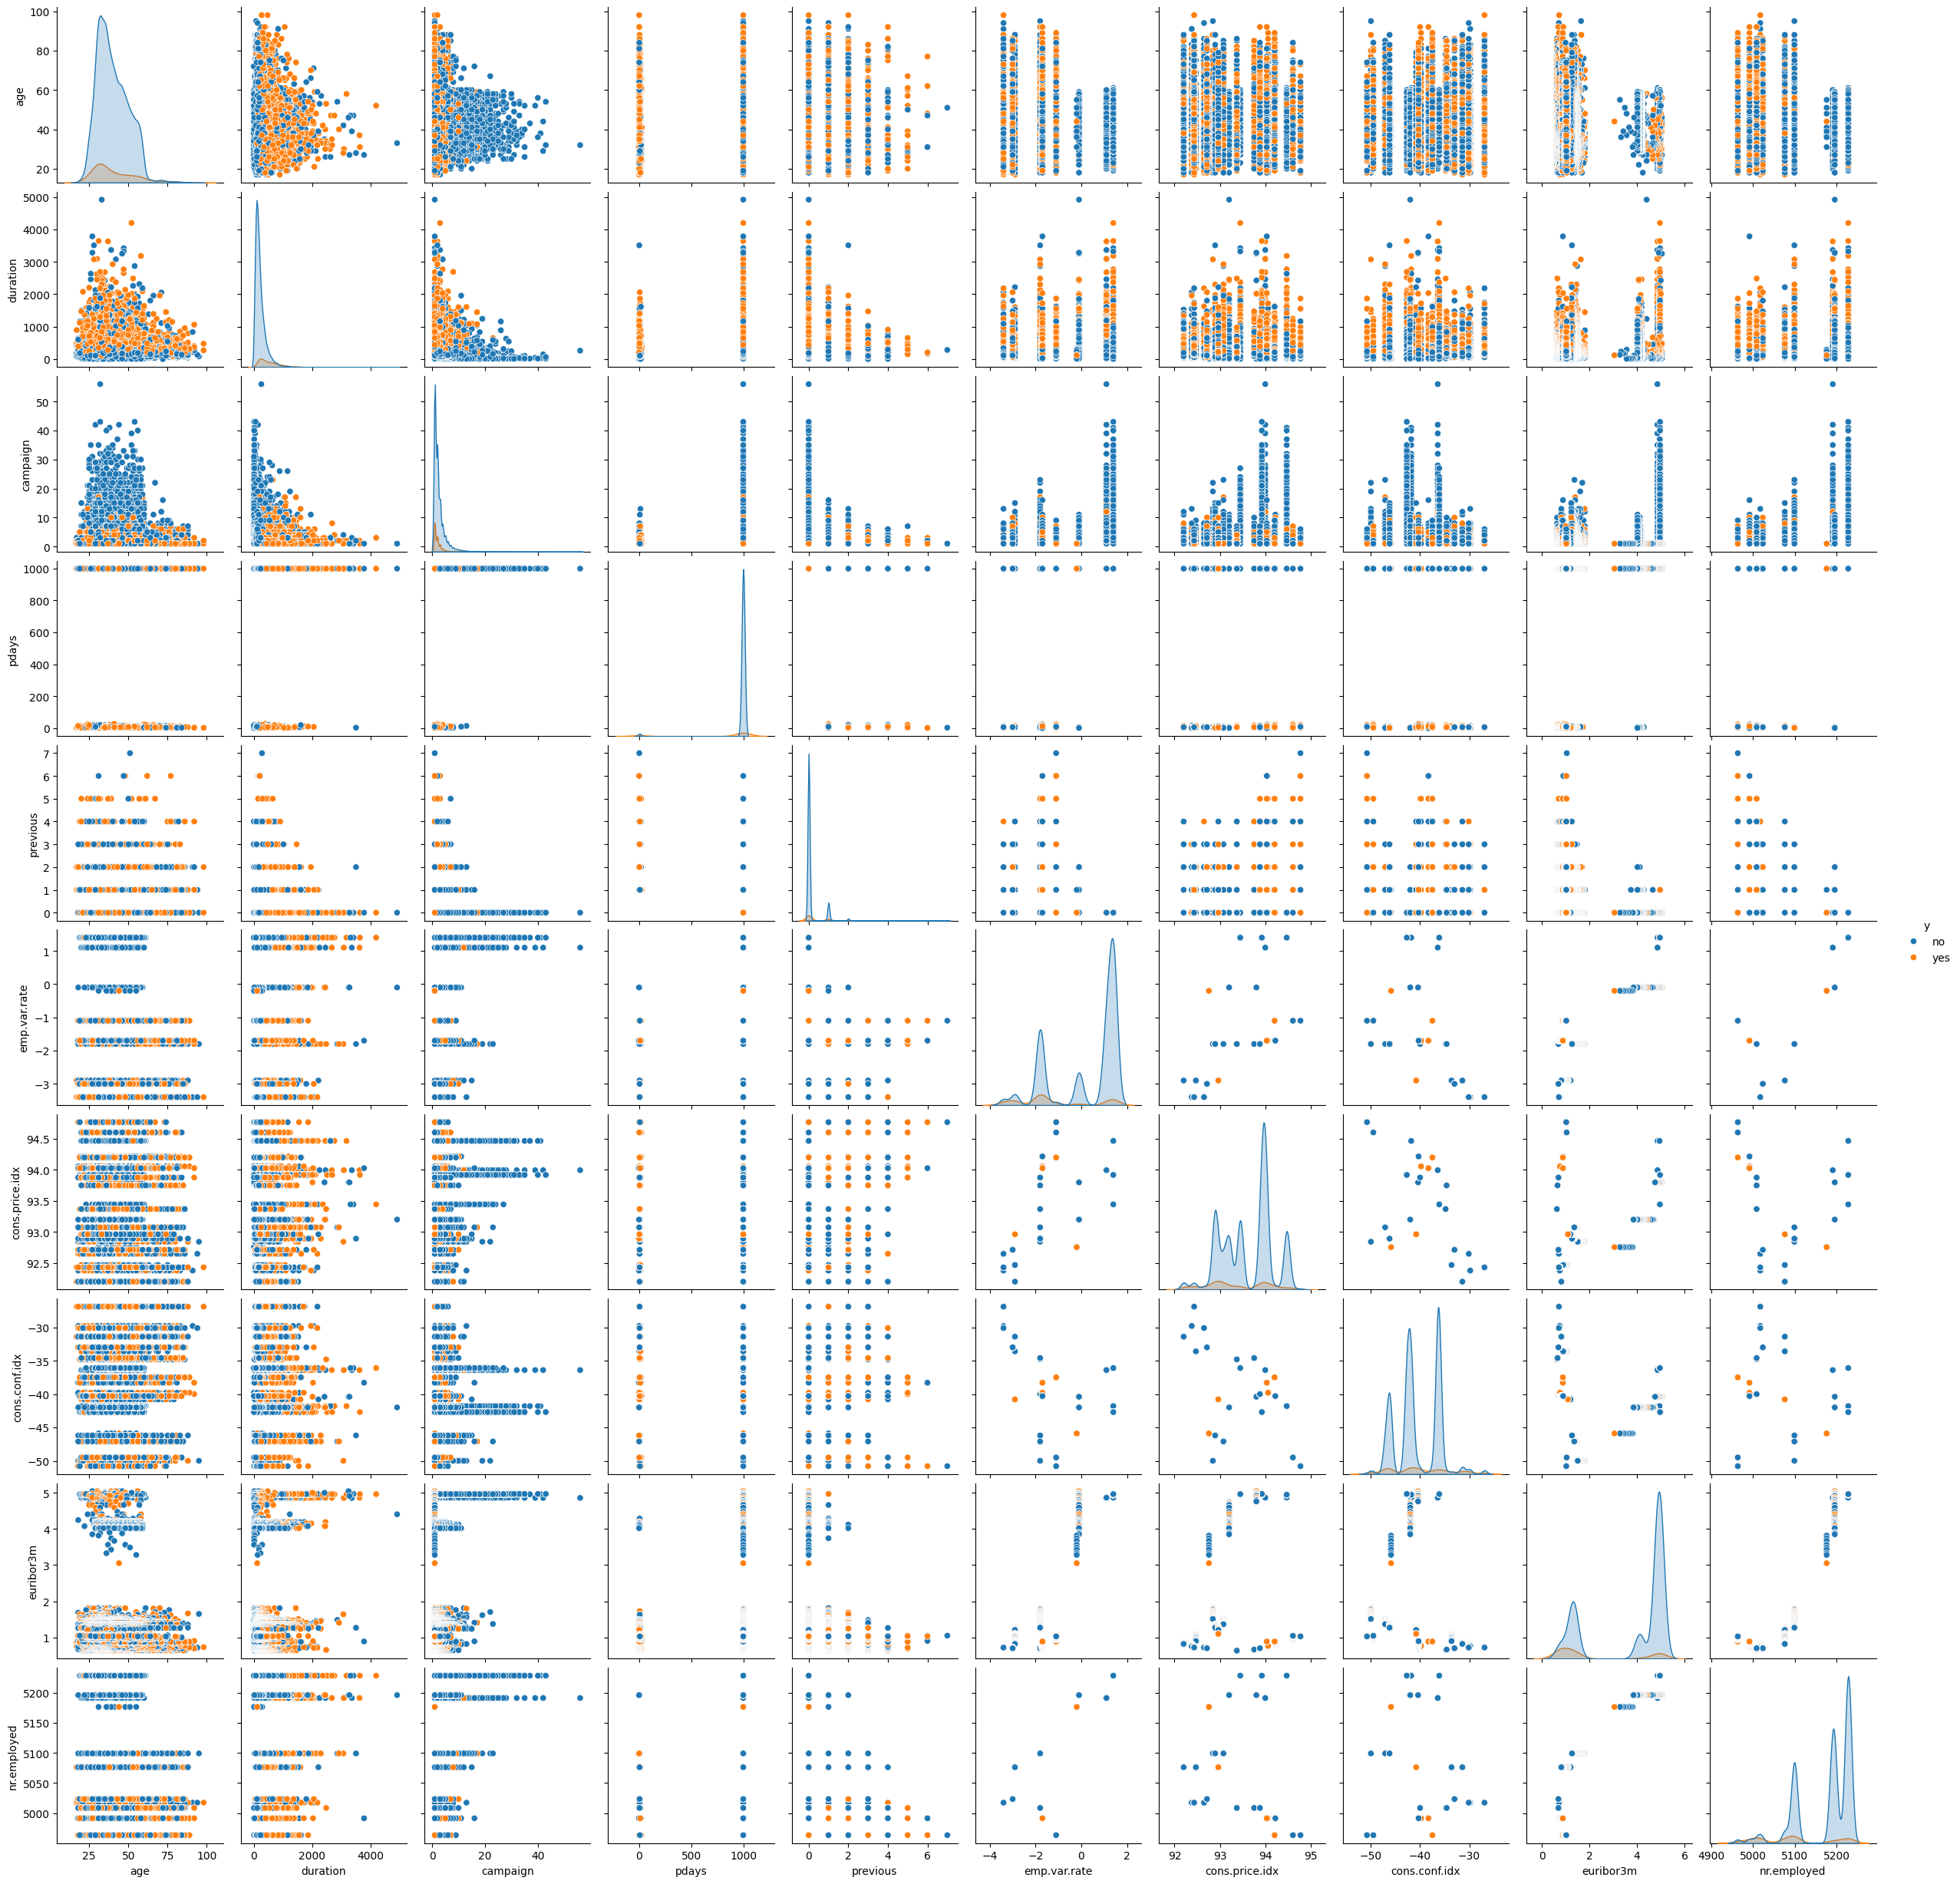

In [12]:
sns.pairplot(data, vars=numerical_cols, hue='y', diag_kind='kde')
plt.show()

#### Trends Over Time

For features like month and day_of_week

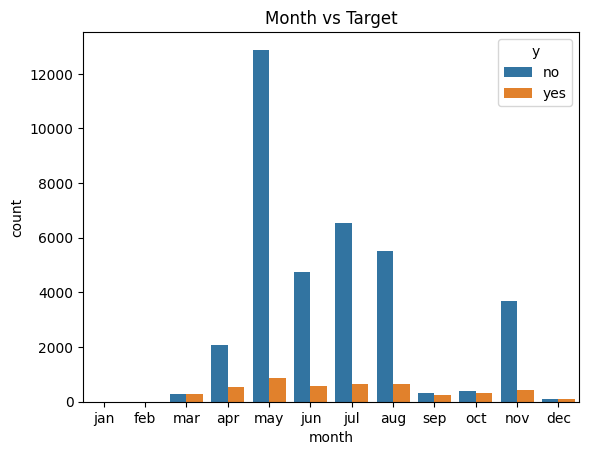

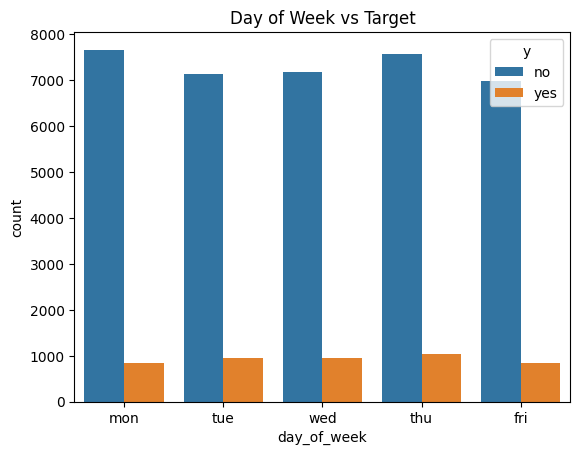

In [13]:
sns.countplot(x='month', hue='y', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title("Month vs Target")
plt.show()

sns.countplot(x='day_of_week', hue='y', data=data)
plt.title("Day of Week vs Target")
plt.show()

## Data Preprocessing

### Handle Missing Values:

• Replace "unknown" with NaN for categorical columns.

• Impute missing values in categorical columns using mode.

• Impute missing values in numerical columns using median.

In [14]:
import pandas as pd
import numpy as np

# Handle missing values: Replace 'unknown' with NaN
categorical_cols = ['job', 'default', 'housing', 'loan', 'contact', 'poutcome', 'marital', 'education', 'month', 'day_of_week']
for col in categorical_cols:
    data[col] = data[col].replace('unknown', np.nan)

# Impute missing values for categorical columns using mode (most frequent value)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Impute missing values for numerical columns using median
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3654602985.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_896\3654602985.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

### Encode Categorical Variables:

• Apply Label Encoding for ordinal columns.

• Apply One-Hot Encoding for nominal columns.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal columns
ordinal_cols = ['marital', 'education', 'month', 'day_of_week']
le = LabelEncoder()
for col in ordinal_cols:
    data[col] = le.fit_transform(data[col])

# One-Hot Encoding for nominal columns
data = pd.get_dummies(data, columns=['job', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first=True)

### Outlier Detection and Removal 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Define numerical columns (adjust based on your dataset)
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5) 

# Fit DBSCAN model and predict clusters
clusters = dbscan.fit_predict(data[numerical_cols])

# Identify outliers (labeled as -1)
outliers = clusters == -1

# Remove outliers from the data
data_cleaned = data[~outliers]

# Check how many outliers were detected
print(f'Number of outliers detected: {outliers.sum()}')

# Review the cleaned data
print(data_cleaned.head())

Number of outliers detected: 30804
    age  marital  education  month  day_of_week  duration  campaign  pdays  \
2    37        1          3      6            1       226         1    999   
3    40        1          1      6            1       151         1    999   
5    45        1          2      6            1       198         1    999   
7    41        1          6      6            1       217         1    999   
12   29        2          3      6            1       137         1    999   

    previous  emp.var.rate  ...  job_services  job_student  job_technician  \
2          0           1.1  ...          True        False           False   
3          0           1.1  ...         False        False           False   
5          0           1.1  ...          True        False           False   
7          0           1.1  ...         False        False           False   
12         0           1.1  ...         False        False           False   

    job_unemployed default_

### Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset with features and target variable 'y'
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scale Numerical Features:

• Use StandardScaler to scale numerical features.

In [19]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features using StandardScaler
scaler = StandardScaler()

# List of numerical columns you want to scale
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Fit the scaler on the training set and transform both training and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Verifying Column Existence

In [20]:
print(X_train.columns)  # Check columns in X_train
print(X_test.columns)   # Check columns in X_test

Index(['age', 'marital', 'education', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')
Index(['age', 'marital', 'education', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone

### Feature Engineering

In [21]:
# Create a new feature 'age_group' based on 'age'
data['age_group'] = pd.cut(data['age'], bins=[20, 40, 60, 80], labels=['Young', 'Middle-aged', 'Old'])

#### Handle Imbalanced Data (SMOTE):

• Use SMOTE to balance the classes in the training data.

In [22]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE (if needed)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### Feature Selection

Univariate Feature Selection with SelectKBest

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

## Model Development

### 1. Build Baseline Models

#### a) Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8640446710366594
Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.87      0.92      7310
         yes       0.45      0.84      0.58       928

    accuracy                           0.86      8238
   macro avg       0.71      0.85      0.75      8238
weighted avg       0.92      0.86      0.88      8238

Confusion Matrix:
 [[6337  973]
 [ 147  781]]


d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### b) Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Model Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8851663025006069
Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.92      0.93      7310
         yes       0.49      0.61      0.54       928

    accuracy                           0.89      8238
   macro avg       0.72      0.76      0.74      8238
weighted avg       0.90      0.89      0.89      8238

Confusion Matrix:
 [[6730  580]
 [ 366  562]]


#### c) Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Model Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8576110706482156
Classification Report:
               precision    recall  f1-score   support

          no       0.99      0.85      0.91      7310
         yes       0.44      0.90      0.59       928

    accuracy                           0.86      8238
   macro avg       0.71      0.88      0.75      8238
weighted avg       0.92      0.86      0.88      8238

Confusion Matrix:
 [[6228 1082]
 [  91  837]]


### 2. Train Ensemble Models

#### a) Bagging Classifier

Used bagging (Bootstrap Aggregating) to reduce variance and improve stability. Bagging can handle overfitting and improve model robustness by averaging multiple models.

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model (decision tree) and the Bagging model
base_model = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
bagging.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_bagging = bagging.predict(X_test)

# Model Evaluation
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

Bagging Accuracy: 0.9027676620538966
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.93      0.94      7310
         yes       0.55      0.71      0.62       928

    accuracy                           0.90      8238
   macro avg       0.76      0.82      0.78      8238
weighted avg       0.92      0.90      0.91      8238

Confusion Matrix:
 [[6775  535]
 [ 266  662]]


#### b) Boosting (AdaBoost/Gradient Boosting)

Use boosting methods to improve weak learners by focusing on errors. Boosting sequentially trains models and emphasizes previous misclassifications, leading to strong predictive performance.

AdaBoost:

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model (decision tree) and AdaBoost
base_model = DecisionTreeClassifier(max_depth=1)  # Use weak learners (stumps)
ada_boost = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
ada_boost.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_ada = ada_boost.predict(X_test)

# Model Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8800679776644816
Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.88      0.93      7310
         yes       0.48      0.85      0.62       928

    accuracy                           0.88      8238
   macro avg       0.73      0.87      0.77      8238
weighted avg       0.92      0.88      0.89      8238

Confusion Matrix:
 [[6460  850]
 [ 138  790]]


Gradient Boosting:

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Model Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8845593590677349
Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.88      0.93      7310
         yes       0.49      0.89      0.63       928

    accuracy                           0.88      8238
   macro avg       0.74      0.89      0.78      8238
weighted avg       0.93      0.88      0.90      8238

Confusion Matrix:
 [[6462  848]
 [ 103  825]]


#### c) Random Forest Classifier

Use Random Forests (a bagging method) to improve decision tree performance with multiple trees. Random Forests reduce overfitting and improve generalization compared to a single decision tree.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9081087642631707
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.93      0.95      7310
         yes       0.57      0.73      0.64       928

    accuracy                           0.91      8238
   macro avg       0.77      0.83      0.79      8238
weighted avg       0.92      0.91      0.91      8238

Confusion Matrix:
 [[6802  508]
 [ 249  679]]


#### d) XGBoost (Extreme Gradient Boosting)

Use XGBoost, an optimized and highly efficient gradient boosting model. XGBoost is known for its speed, performance, and ability to handle large datasets effectively.

In [32]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical target labels ('no', 'yes') to numeric (0, 1)
y_train_resampled = le.fit_transform(y_train_resampled)
y_test = le.transform(y_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9118718135469774
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7310
           1       0.59      0.71      0.64       928

    accuracy                           0.91      8238
   macro avg       0.78      0.82      0.80      8238
weighted avg       0.92      0.91      0.92      8238

Confusion Matrix:
 [[6855  455]
 [ 271  657]]


## Model Evaluation and Comparison

##### 1. Evaluate Model Performance

Cross-Validation:

Cross-validation helps assess the model's ability to generalize to new data, helping to avoid overfitting.

Initialize the models and Perform cross-validation

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np

# Initialize models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Create a dictionary for models
models = {
    "Logistic Regression": logreg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    fold_accuracies = []
    for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
        # Use pandas DataFrame indexing for X, and NumPy indexing for y
        X_train_cv, X_test_cv = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
        y_train_cv, y_test_cv = y_train_resampled[train_index], y_train_resampled[test_index]

        # Fit model and make predictions
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        # Calculate accuracy for this fold
        fold_accuracies.append(accuracy_score(y_test_cv, y_pred))
    
    # Store the mean accuracy and standard deviation for the model
    cv_results[model_name] = fold_accuracies
    print(f"{model_name} - Cross-validation Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")


d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

Logistic Regression - Cross-validation Accuracy: 0.8737 ± 0.0033
Decision Tree - Cross-validation Accuracy: 0.9199 ± 0.0035
Random Forest - Cross-validation Accuracy: 0.9506 ± 0.0024
XGBoost - Cross-validation Accuracy: 0.9467 ± 0.0021


Compare the cross-validation results

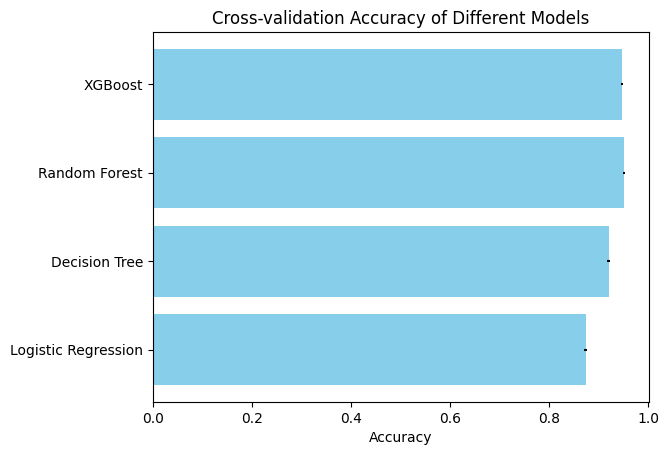

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting cross-validation scores
model_names = list(cv_results.keys())
mean_scores = [np.mean(cv_scores) for cv_scores in cv_results.values()]
std_scores = [np.std(cv_scores) for cv_scores in cv_results.values()]

plt.barh(model_names, mean_scores, xerr=std_scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Cross-validation Accuracy of Different Models")
plt.show()

Performance Metrics:

• Accuracy: The proportion of correct predictions.<br>
• Precision: The proportion of true positives among all positive predictions.<br>
• Recall: The proportion of true positives among all actual positives.<br>
• F1-Score: The harmonic mean of Precision and Recall, useful when you need to balance Precision and Recall.<br>
• ROC-AUC: The area under the Receiver Operating Characteristic curve, which helps you understand how well the model performs at different classification thresholds.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# List of models to evaluate
models = {
    "Logistic Regression": logreg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Dictionary to store the performance metrics
performance_metrics = {}

for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store metrics in the dictionary
    performance_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix
    }

    # Print the performance metrics for each model
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("-" * 50)

Performance Metrics for Logistic Regression:
Accuracy: 0.8642
Precision: 0.4455
Recall: 0.8405
F1-Score: 0.5823
ROC-AUC: 0.8538
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      7310
           1       0.45      0.84      0.58       928

    accuracy                           0.86      8238
   macro avg       0.71      0.85      0.75      8238
weighted avg       0.92      0.86      0.88      8238

Confusion Matrix:
 [[6339  971]
 [ 148  780]]
--------------------------------------------------
Performance Metrics for Decision Tree:
Accuracy: 0.8787
Precision: 0.4710
Recall: 0.6207
F1-Score: 0.5356
ROC-AUC: 0.7661
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7310
           1       0.47      0.62      0.54       928

    accuracy                           0.88      8238
   macro avg       0.71      0.77      0.73      8238
weight

#### 2. Model Comparison

Compare Baseline Models Against Ensemble Models

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define the models (Baseline models)
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Define the ensemble models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)  # XGBClassifier is now correctly imported

# Assume you've already trained these models on your training data
logreg_model.fit(X_train_resampled, y_train_resampled)
dt_model.fit(X_train_resampled, y_train_resampled)
svm_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Define model groups
baseline_models = [logreg_model, dt_model, svm_model]
baseline_names = ['Logistic Regression', 'Decision Tree', 'SVM']

ensemble_models = [rf_model, xgb_model]
ensemble_names = ['Random Forest', 'XGBoost']

# Function to evaluate and print metrics for each model
def evaluate_model(model, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print performance metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Evaluate baseline models
for model, name in zip(baseline_models, baseline_names):
    evaluate_model(model, name)

# Evaluate ensemble models
for model, name in zip(ensemble_models, ensemble_names):
    evaluate_model(model, name)

d:\Works\Mora!!!\Year-3\Sem-1\CM3720 - ML\client_behavior_prediction_model\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.8640
Precision: 0.4453
Recall: 0.8416
F1-Score: 0.5824
ROC-AUC: 0.8542
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7310
           1       0.45      0.84      0.58       928

    accuracy                           0.86      8238
   macro avg       0.71      0.85      0.75      8238
weighted avg       0.92      0.86      0.88      8238

Confusion Matrix:
[[6337  973]
 [ 147  781]]

Decision Tree Performance:
Accuracy: 0.8852
Precision: 0.4921
Recall: 0.6056
F1-Score: 0.5430
ROC-AUC: 0.7631
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.49      0.61      0.54       928

    accuracy                           0.89      8238
   macro avg       0.72      0.76      0.74      8238
weighted avg       0.90      0.89      0.89      8238

Confusion Matrix:
[[6730  5

Confusion Matrix: Use the confusion matrix to visualize model performance, showing true positives, false positives, true negatives, and false negatives.

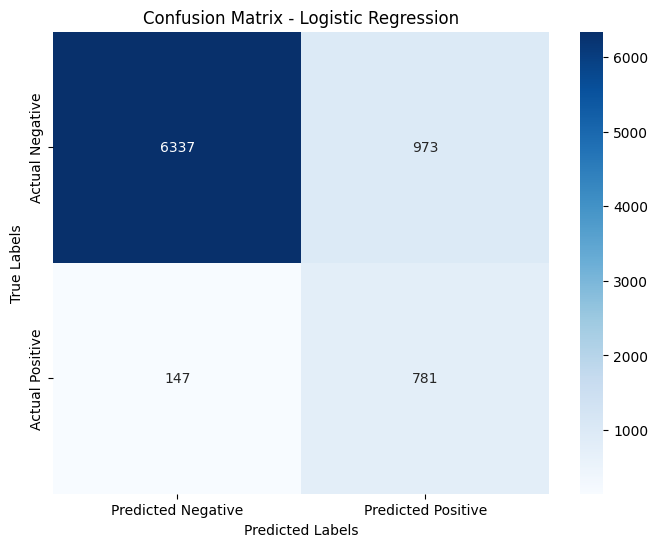

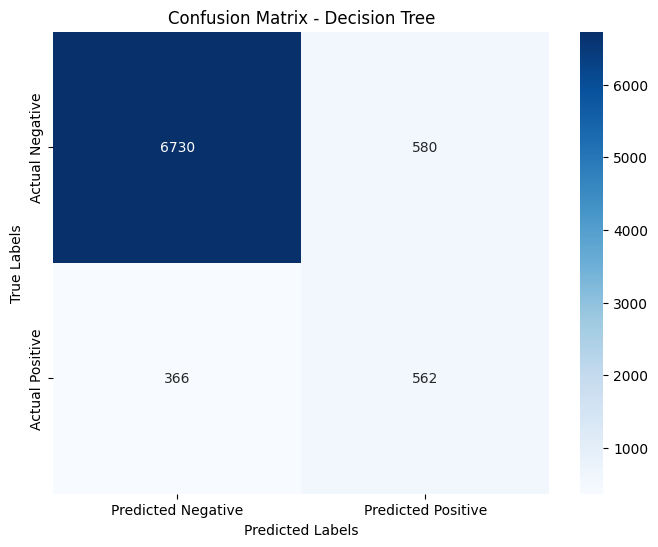

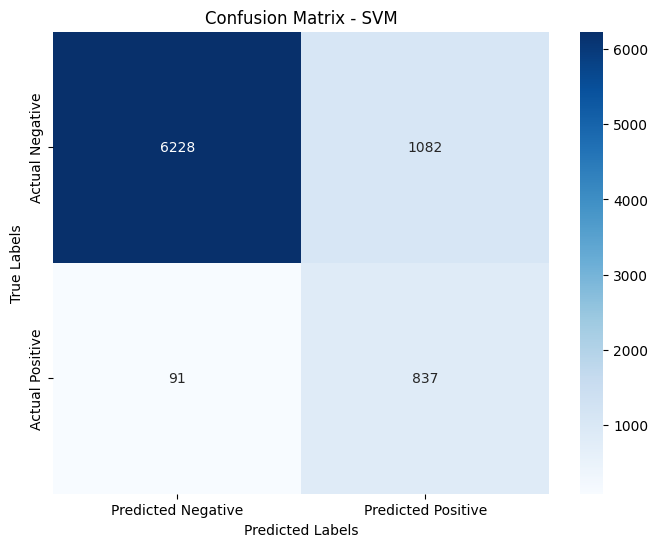

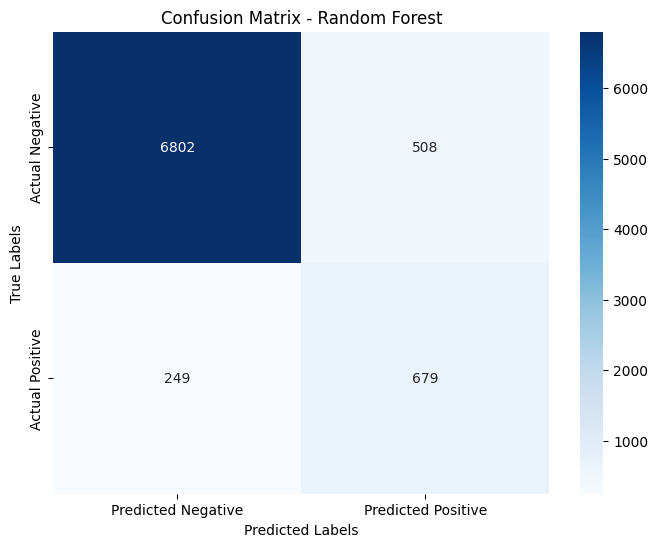

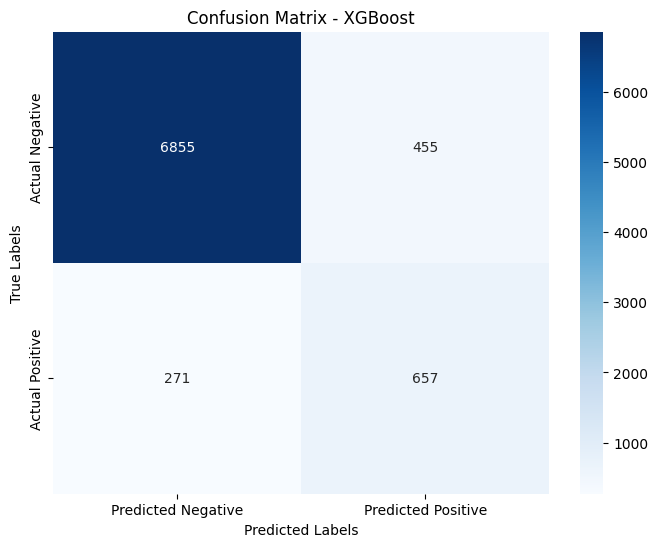

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# List of models and their names
models = [logreg_model, dt_model, svm_model, rf_model, xgb_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'XGBoost']

# Loop through each model, make predictions, and evaluate metrics
for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize the confusion matrix with a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Feature Importance

Feature importance helps you understand which variables have the most influence on the model's predictions. This is particularly useful for explaining model behavior and identifying key drivers of customer behavior.

1. Logistic Regression Feature Importance

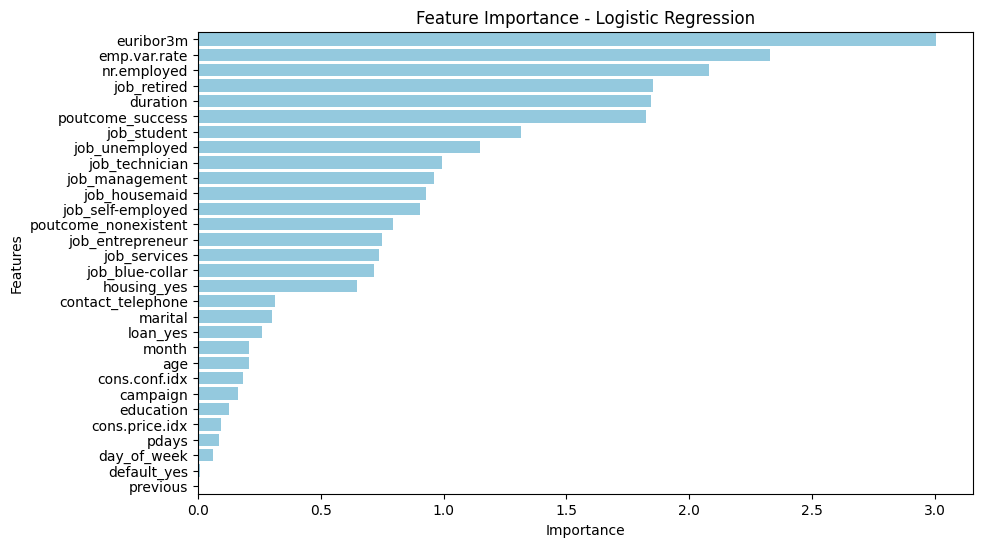

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming logreg_model is already trained and X_train_resampled is your training dataset
# Extract feature names from X_train_resampled
feature_names = X_train_resampled.columns

# Logistic Regression: Use absolute values of coefficients for feature importance
importance = np.abs(logreg_model.coef_[0])

# Sort the features by importance
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted, y=feature_names_sorted, color='skyblue')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

2. Decision Tree Feature Importance

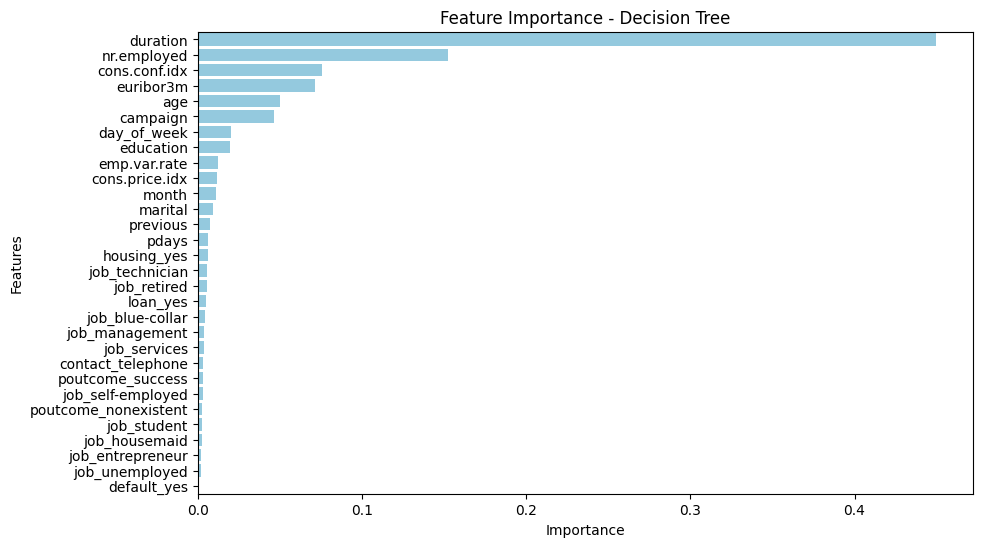

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dt_model is already trained and X_train_resampled is your training dataset
# Extract feature names from X_train_resampled
feature_names = X_train_resampled.columns

# Decision Tree: Use the feature importances directly
importance = dt_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted, y=feature_names_sorted, color='skyblue')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

3. Random Forest Feature Importance

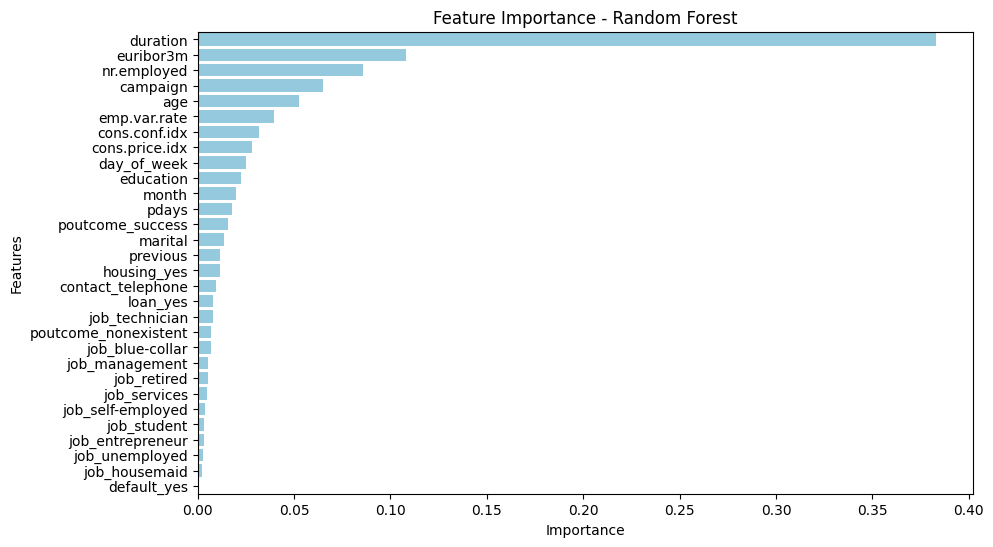

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model is already trained and X_train_resampled is your training dataset
# Extract feature names from X_train_resampled
feature_names = X_train_resampled.columns

# Random Forest: Use the feature importances directly
importance = rf_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted, y=feature_names_sorted, color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

4. XGBoost Feature Importance

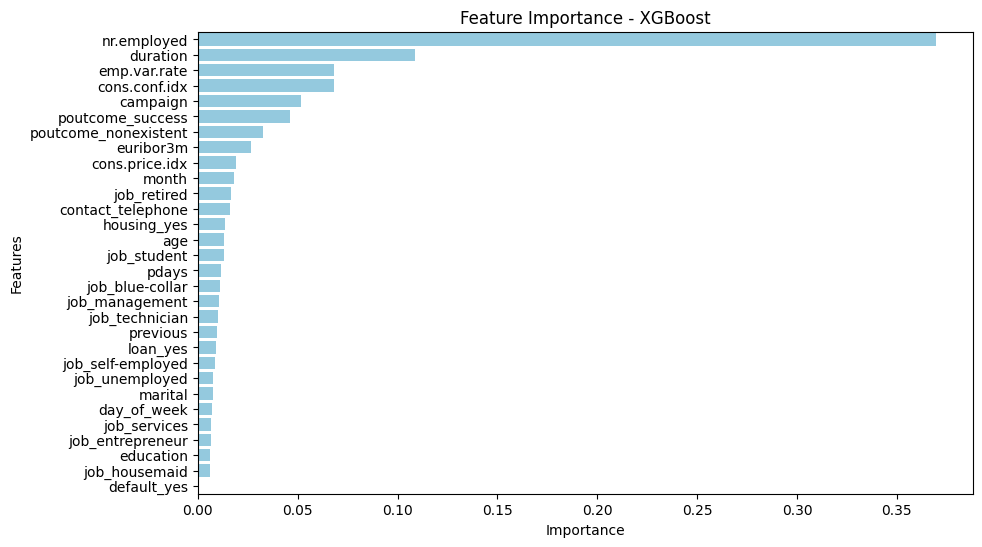

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xgb_model is already trained and X_train_resampled is your training dataset
# Extract feature names from X_train_resampled
feature_names = X_train_resampled.columns

# XGBoost: Use the feature importances directly
importance = xgb_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted, y=feature_names_sorted, color='skyblue')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Results and Recommendations

### Select the Best-Performing Model:

Based on the model evaluation metrics (e.g., accuracy, F1-score), select the best model.

In [ ]:
# Define the models and their metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.8642, 0.8787, 0.9063, 0.9127]
precisions = [0.4455, 0.4710, 0.5625, 0.5953]
recalls = [0.8405, 0.6207, 0.7565, 0.7037]
f1_scores = [0.5823, 0.5356, 0.6452, 0.6449]
roc_auc_scores = [0.8538, 0.7661, 0.8409, 0.8215]

# Create a DataFrame for easy comparison
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'ROC-AUC': roc_auc_scores
})

# Print the DataFrame for a quick overview
print(metrics_df)

# Select the best model based on F1-Score (or another metric you prefer)
best_model_index = metrics_df['F1-Score'].idxmax()  # You can change to 'Accuracy', 'Precision', etc.
best_model = metrics_df.iloc[best_model_index]

print("\nRecommended Model:")
print(best_model)


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.8642     0.4455  0.8405    0.5823   0.8538
1        Decision Tree    0.8787     0.4710  0.6207    0.5356   0.7661
2        Random Forest    0.9063     0.5625  0.7565    0.6452   0.8409
3              XGBoost    0.9127     0.5953  0.7037    0.6449   0.8215

Recommended Model:
Model        Random Forest
Accuracy            0.9063
Precision           0.5625
Recall              0.7565
F1-Score            0.6452
ROC-AUC             0.8409
Name: 2, dtype: object


In [61]:
import pandas as pd

# Convert y_train and y_test to Pandas DataFrames (or Series)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

# Save the features and target variables as CSV files
X_train.to_csv('./data/X_train.csv', index=False)
y_train_df.to_csv('./data/y_train.csv', index=False)

X_test.to_csv('./data/X_test.csv', index=False)
y_test_df.to_csv('./data/y_test.csv', index=False)

print("Training and testing data saved as CSV!")

Training and testing data saved as CSV!


Save Models

In [65]:
import joblib
import os

# Ensure the 'models' folder exists
os.makedirs('models', exist_ok=True)

# Define your trained models 
logreg_model = logreg_model  
dt_model = dt_model  
rf_model = rf_model 
xgb_model = xgb_model  

# Save each model using joblib with versioning
joblib.dump(logreg_model, 'models/logistic_regression_model_v1.joblib')
joblib.dump(dt_model, 'models/decision_tree_model_v1.joblib')
joblib.dump(rf_model, 'models/random_forest_model_v1.joblib')
joblib.dump(xgb_model, 'models/xgboost_model_v1.joblib')

print("Models saved successfully in the 'models' folder!")

Models saved successfully in the 'models' folder!


Save the performance metrics of each model

In [66]:
import os
import pandas as pd

# Ensure the 'metrics' folder exists
os.makedirs('metrics', exist_ok=True)

# Define the model performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.8642, 0.8787, 0.9063, 0.9127]
precisions = [0.4455, 0.4710, 0.5625, 0.5953]
recalls = [0.8405, 0.6207, 0.7565, 0.7037]
f1_scores = [0.5823, 0.5356, 0.6452, 0.6449]
roc_auc_scores = [0.8538, 0.7661, 0.8409, 0.8215]

# Create a DataFrame for each model's metrics and save separately
for model, acc, prec, rec, f1, roc in zip(models, accuracies, precisions, recalls, f1_scores, roc_auc_scores):
    # Create a DataFrame for the current model
    model_metrics_df = pd.DataFrame({
        'Model': [model],
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1-Score': [f1],
        'ROC-AUC': [roc]
    })
    
    # Save the model's metrics to a separate CSV file
    model_filename = f"metrics/{model.replace(' ', '_')}_v1_metrics.csv"
    model_metrics_df.to_csv(model_filename, index=False)
    print(f"Metrics for {model} saved successfully in {model_filename}!")

Metrics for Logistic Regression saved successfully in metrics/Logistic_Regression_v1_metrics.csv!
Metrics for Decision Tree saved successfully in metrics/Decision_Tree_v1_metrics.csv!
Metrics for Random Forest saved successfully in metrics/Random_Forest_v1_metrics.csv!
Metrics for XGBoost saved successfully in metrics/XGBoost_v1_metrics.csv!


## Hyperparameter Tuning

Define the Hyperparameters Distribution

• n_estimators: The number of trees in the forest.<br>
• max_depth: The maximum depth of the trees.<br>
• min_samples_split: The minimum number of samples required to split an internal node.<br>
• min_samples_leaf: The minimum number of samples required to be at a leaf node.<br>
• max_features: The number of features to consider when looking for the best split.

In [74]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score
)
import joblib

# Load the pre-trained Random Forest model (v1)
rf_model_v1 = joblib.load('models/random_forest_model_v1.joblib')

# Define a reduced hyperparameter grid for faster tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV with reduced folds and parallelism
grid_search = GridSearchCV(
    estimator=rf_model_v1,
    param_grid=param_grid,
    cv=3,  # Use 3-fold cross-validation to save time
    n_jobs=1,  # Use 2 parallel jobs
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearchCV to the training data
print("Starting grid search...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
print("\nEvaluating the best model...")
y_pred = best_rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Update to 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Generate detailed performance metrics
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)

Starting grid search...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_

Save the tuned model and metrics

In [79]:
import pandas as pd
import joblib

# Save the tuned Random Forest model as random_forest_model_v2
joblib.dump(best_rf_model, 'models/random_forest_model_v2.joblib')
print("Tuned model saved as 'models/random_forest_model_v2.joblib'.")

# Create a dictionary for the performance metrics
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(performance_metrics)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv('metrics/random_forest_v2_metrics.csv', index=False)
print("Performance metrics saved as 'metrics/random_forest_v2_metrics.csv'.")

Tuned model saved as 'models/random_forest_model_v2.joblib'.
Performance metrics saved as 'metrics/random_forest_v2_metrics.csv'.


Final Model Performance Comparison

In [82]:
import pandas as pd

# Load the V1 metrics and convert to a dictionary
v1_metrics_df = pd.read_csv('metrics/random_forest_v1_metrics.csv')
v1_metrics = {
    'Accuracy': v1_metrics_df['Accuracy'].values[0],
    'Precision': v1_metrics_df['Precision'].values[0],
    'Recall': v1_metrics_df['Recall'].values[0],
    'F1_Score': v1_metrics_df['F1-Score'].values[0],  # Use exact column name
    'ROC_AUC': v1_metrics_df['ROC-AUC'].values[0]     # Use exact column name
}

# Load the V2 metrics and convert to a dictionary
v2_metrics_df = pd.read_csv('metrics/random_forest_v2_metrics.csv')
v2_metrics = dict(zip(v2_metrics_df['Metric'], v2_metrics_df['Value']))

# List of metrics to compare
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']

# Compare the two models
print("\nPerformance Comparison:")
for metric in metrics_to_compare:
    v1_value = v1_metrics.get(metric, None)
    v2_value = v2_metrics.get(metric, None)
    if v1_value is not None and v2_value is not None:
        print(f"{metric}:")
        print(f"  V1: {v1_value:.4f}")
        print(f"  V2: {v2_value:.4f}")
        if v2_value > v1_value:
            print(f"  -> V2 is better in {metric}.")
        elif v1_value > v2_value:
            print(f"  -> V1 is better in {metric}.")
        else:
            print(f"  -> Both models perform equally in {metric}.")
        print()
    else:
        print(f"{metric} is missing in one of the files.")


Performance Comparison:
Accuracy:
  V1: 0.9063
  V2: 0.9075
  -> V2 is better in Accuracy.

Precision:
  V1: 0.5625
  V2: 0.5689
  -> V2 is better in Precision.

Recall:
  V1: 0.7565
  V2: 0.7381
  -> V1 is better in Recall.

F1_Score:
  V1: 0.6452
  V2: 0.6426
  -> V1 is better in F1_Score.

ROC_AUC:
  V1: 0.8409
  V2: 0.9475
  -> V2 is better in ROC_AUC.

